In [1]:
import aequitas
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.plotting import Plot
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 500)
%load_ext autoreload
%autoreload 2
%matplotlib inline

SyntaxError: invalid syntax (bias.py, line 107)

## Pre-Processing

In [2]:
test = pd.read_csv('output_files/test.csv')
train = pd.read_csv('output_files/train.csv')

In [3]:
train

,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,low-flag,imputed,subbed,avg_household_size_owner,avg_household_size_renter,Total_Less_Than_HS,Total_HS_Grad,Total_Some_College_or_AAS,Total_Bachelors,Mean_hours_worked,Primary Type,redlined,crime_rate,if_top_10
0,170310101001,2005,596.41,33.66,174.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.428945,2.017695,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.137489,1
1,170310101001,2006,596.41,33.66,169.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.428945,2.017695,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.191144,1
2,170310101001,2007,596.41,33.66,165.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.428945,2.017695,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.219648,1
3,170310101002,2005,2313.19,33.66,899.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.261083,3.791037,558.568213,574.498857,921.986034,753.718604,37.237881,7,0.0,0.258517,0
4,170310101002,2006,2313.19,33.66,898.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.261083,3.791037,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.217881,0
5,170310101002,2007,2313.19,33.66,896.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.261083,3.791037,558.568213,574.498857,921.986034,753.718604,37.237881,7,0.0,0.233012,0
6,170310101003,2005,1923.45,33.66,798.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,1.747498,1.651386,558.568213,574.498857,921.986034,753.718604,37.237881,7,0.0,0.146092,1
7,170310101003,2006,1923.45,33.66,789.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,1.747498,1.651386,558.568213,574.498857,921.986034,753.718604,37.237881,7,0.0,0.118017,1
8,170310101003,2007,1923.45,33.66,779.0,80.24,1,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,1.747498,1.651386,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.163248,1
9,170310102011,2005,1305.73,32.25,392.0,66.82,1,0,0,36.90,16.09,49.80,28.01,0.00,4.45,0.0,1.64,0.00,0,0,0,1.625878,2.097246,615.035981,827.347163,862.573682,825.443027,36.749828,7,0.0,0.159298,1


In [4]:
model = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=100)

In [5]:
train.columns

Index(['GEOID', 'Date', 'population', 'poverty-rate',
       'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'low-flag',
       'imputed', 'subbed', 'avg_household_size_owner',
       'avg_household_size_renter', 'Total_Less_Than_HS', 'Total_HS_Grad',
       'Total_Some_College_or_AAS', 'Total_Bachelors', 'Mean_hours_worked',
       'Primary Type', 'redlined', 'crime_rate', 'if_top_10'],
      dtype='object')

In [6]:
pred_vars = ['population', 'poverty-rate',
       'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'low-flag',
       'imputed', 'subbed', 'avg_household_size_owner',
       'avg_household_size_renter', 'Total_Less_Than_HS', 'Total_HS_Grad',
       'Total_Some_College_or_AAS', 'Total_Bachelors', 'Mean_hours_worked',
       'Primary Type', 'redlined', 'crime_rate']
dep_var = 'if_top_10'

In [7]:
X_train = train[pred_vars]
y_train = train[dep_var]
X_test = test[pred_vars]
y_test = test[dep_var]

In [8]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
y_pred = model.predict(X_test)

In [10]:
X_test['label'] = y_test
X_test['predicted'] = y_pred

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
data_interested = X_test[['median-gross-rent', 'median-household-income', 'median-property-value', 'pct-white', 'pct-af-am'
                         , 'pct-hispanic', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'avg_household_size_owner',
                        'avg_household_size_renter', 'redlined', 'label', 'predicted']]

In [18]:
data_interested

,median-gross-rent,median-household-income,median-property-value,pct-white,pct-af-am,pct-hispanic,pct-asian,pct-nh-pi,pct-multiple,pct-other,avg_household_size_owner,avg_household_size_renter,redlined,label,predicted
0,1,0,0,21.72,48.93,13.44,11.00,0.00,4.90,0.00,2.428945,2.017695,0.0,1,1
1,1,0,0,21.72,48.93,13.44,11.00,0.00,4.90,0.00,2.428945,2.017695,0.0,1,1
2,1,0,0,42.31,29.02,20.90,3.63,0.00,3.11,0.86,2.360052,1.960466,0.0,1,0
3,1,0,0,21.72,48.93,13.44,11.00,0.00,4.90,0.00,2.261083,3.791037,0.0,0,0
4,1,0,0,21.72,48.93,13.44,11.00,0.00,4.90,0.00,2.261083,3.791037,0.0,0,0
5,1,0,0,14.84,68.89,10.73,1.56,0.00,3.33,0.26,2.258944,3.787451,0.0,0,0
6,1,0,0,21.72,48.93,13.44,11.00,0.00,4.90,0.00,1.747498,1.651386,0.0,0,0
7,1,0,0,21.72,48.93,13.44,11.00,0.00,4.90,0.00,1.747498,1.651386,0.0,0,0
8,1,0,0,46.49,32.08,12.58,4.74,0.00,3.41,0.56,1.785132,1.686950,0.0,0,0
9,1,0,0,16.09,49.80,28.01,4.45,0.00,1.64,0.00,1.625878,2.097246,0.0,0,0


In [46]:
def return_majority_race(row):
    
    max_ = 0
    race = 'whatever'
    race_list = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
    race_dic = {'pct-white': 'White', 'pct-af-am': 'African American', 'pct-asian': 'Asian', 'pct-nh-pi': 'Native Hawaiian and Pacific Islander',
               'pct-multiple': 'Multiple Race', 'pct-other': 'Other', 'pct-hispanic': 'Hispanic'}
    for race_ in race_list:
        if row[race_] > max_:
            max_ = row[race_]
            race = race_
    if race == 'whatever':
        return 'No Majority Race Reported'
    else:
        return race_dic[race]

In [47]:
row = data_interested.iloc[707]
row

median-gross-rent            1.000000
median-household-income      0.000000
median-property-value        0.000000
pct-white                    0.000000
pct-af-am                    0.000000
pct-hispanic                 0.000000
pct-asian                    0.000000
pct-nh-pi                    0.000000
pct-multiple                 0.000000
pct-other                    0.000000
avg_household_size_owner     2.671364
avg_household_size_renter    2.439442
redlined                     0.000000
label                        1.000000
predicted                    0.000000
Name: 707, dtype: float64

In [48]:
return_majority_race(row)

'No Majority Race Reported'

In [49]:
data_interested['majority_race'] = data_interested.apply(lambda row: return_majority_race(row), axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
df = data_interested[['label', 'predicted',
       'majority_race']]

In [128]:
df.shape

(6582, 3)

## Auditing

By predicted value
<br>
In the bar charts below, we see a difference in how the predicted outcomes are distributed by race, with many blocks whose majority race are white and Hispanic people predicted as 0 (Will not be top 10% in eviction rate in the next three years) and a considerable number of blocks whose majority race is African American predicted as 1 (Will be top 10% in eviction rate in the next three years).

In [129]:
aqp = Plot()

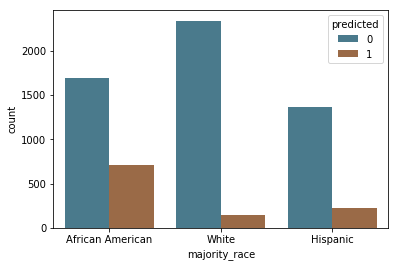

In [130]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_race = sns.countplot(x="majority_race", hue="predicted", data=df[df.majority_race.isin(['African American', 'White', 'Hispanic'])], palette=aq_palette)

By label value

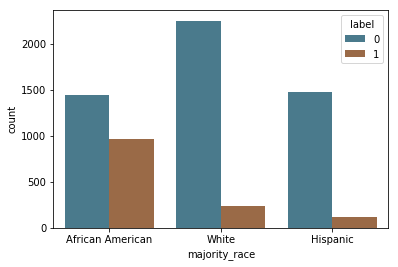

In [131]:
by_race = sns.countplot(x="majority_race", hue="label", data=df[df.majority_race.isin(['African American', 'White', 'Hispanic'])], palette=aq_palette)

It is observed that the distribution in 'predicted' and 'label' are quite consistent. No significant bias on certain groups

Put Aequitas Into work

In [132]:
df = df.rename({'predicted':"score", "label":"label_value"}, axis = 1)

In [133]:
for col in df.columns[2:]:
    df[col] = df[col].astype('str')

In [134]:
g = Group()
xtab, _ = g.get_crosstabs(df)

model_id, score_thresholds 1 {'rank_abs': [1087]}


View calculated counts across sample population groups

In [135]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,1,binary 0/1,1087,majority_race,African American,711,1700,288,545,1155,423,968,1443,2411,6582
1,1,binary 0/1,1087,majority_race,Asian,10,67,10,4,63,0,4,73,77,6582
2,1,binary 0/1,1087,majority_race,Hispanic,223,1369,186,78,1291,37,115,1477,1592,6582
3,1,binary 0/1,1087,majority_race,No Majority Race Reported,0,18,0,2,16,0,2,16,18,6582
4,1,binary 0/1,1087,majority_race,White,143,2341,94,185,2156,49,234,2250,2484,6582


View calculated absolute metrics for each sample population group

In [136]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,majority_race,African American,0.44,0.80,0.32,0.41,0.20,0.56,0.68,0.59,0.65,0.29,0.40
1,majority_race,Asian,0.00,0.86,0.06,1.00,0.14,1.00,0.94,0.00,0.01,0.13,0.05
2,majority_race,Hispanic,0.32,0.87,0.06,0.83,0.13,0.68,0.94,0.17,0.21,0.14,0.07
3,majority_race,No Majority Race Reported,0.00,1.00,0.11,NaN,0.00,1.00,0.89,NaN,0.00,0.00,0.11
4,majority_race,White,0.21,0.96,0.08,0.66,0.04,0.79,0.92,0.34,0.13,0.06,0.09


we see that blocks whose majority residents are African-Americans have a false positive rate (fpr) of 20%, while those whose majority residents are Whites have a false positive rate of only 4%. This means that African-American block groups are more likely to be falsely labeled as high-risk than White block groups. On the other hand, false discovery rates (fdr) are much closer for those two groups.

In [139]:
b = Bias()
bdf = b.get_disparity_predefined_groups(
    xtab, original_df=df, ref_groups_dict={'majority_race':'White'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,1,binary 0/1,1087,majority_race,African American,0.436983,0.800416,0.320588,0.405063,0.199584,0.563017,0.679412,0.594937,711,1700,0.654094,0.294898,288,545,1155,423,968,1443,2411,6582,0.401493,4.97203,5.12257,1.73624,0.616213,4.05674,4.77728,0.71214,2.08682,0.835313,0.73771,White,White,White,White,White,White,White,White,White,White
1,1,binary 0/1,1087,majority_race,Asian,0,0.863014,0.0597015,1,0.136986,1,0.940299,0,10,67,0.00919963,0.12987,10,4,63,0,4,73,77,6582,0.0519481,0.0699301,2.25593,0,1.52128,0.755466,3.27893,1.26486,0,0.90064,1.02098,White,White,White,White,White,White,White,White,White,White
2,1,binary 0/1,1087,majority_race,Hispanic,0.321739,0.874069,0.0569759,0.834081,0.125931,0.678261,0.943024,0.165919,223,1369,0.205152,0.140075,186,78,1291,37,115,1477,1592,6582,0.0722362,1.55944,2.4332,0.484213,1.26887,0.720976,3.0143,0.857908,1.53647,0.912178,1.02394,White,White,White,White,White,White,White,White,White,White
3,1,binary 0/1,1087,majority_race,No Majority Race Reported,0,1,0.111111,nan,0,1,0.888889,nan,0,18,0,0,0,2,16,0,2,16,18,6582,0.111111,0,0,nan,nan,1.40601,0,1.26486,0,1.0436,0.965162,White,White,White,White,White,White,White,White,White,White
4,1,binary 0/1,1087,majority_race,White,0.209402,0.958222,0.0790261,0.657343,0.0417778,0.790598,0.920974,0.342657,143,2341,0.131555,0.0575684,94,185,2156,49,234,2250,2484,6582,0.0942029,1,1,1,1,1,1,1,1,1,1,White,White,White,White,White,White,White,White,White,White


In [145]:
bdf

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,1,binary 0/1,1087,majority_race,African American,0.436983,0.800416,0.320588,0.405063,0.199584,0.563017,0.679412,0.594937,711,1700,0.654094,0.294898,288,545,1155,423,968,1443,2411,6582,0.401493,4.972028,5.122571,1.736244,0.616213,4.056741,4.777281,0.712140,2.086819,0.835313,0.737710,White,White,White,White,White,White,White,White,White,White
1,1,binary 0/1,1087,majority_race,Asian,0.000000,0.863014,0.059701,1.000000,0.136986,1.000000,0.940299,0.000000,10,67,0.009200,0.129870,10,4,63,0,4,73,77,6582,0.051948,0.069930,2.255926,0.000000,1.521277,0.755466,3.278927,1.264865,0.000000,0.900640,1.020983,White,White,White,White,White,White,White,White,White,White
2,1,binary 0/1,1087,majority_race,Hispanic,0.321739,0.874069,0.056976,0.834081,0.125931,0.678261,0.943024,0.165919,223,1369,0.205152,0.140075,186,78,1291,37,115,1477,1592,6582,0.072236,1.559441,2.433197,0.484213,1.268867,0.720976,3.014304,0.857908,1.536469,0.912178,1.023942,White,White,White,White,White,White,White,White,White,White
3,1,binary 0/1,1087,majority_race,No Majority Race Reported,0.000000,1.000000,0.111111,NaN,0.000000,1.000000,0.888889,NaN,0,18,0.000000,0.000000,0,2,16,0,2,16,18,6582,0.111111,0.000000,0.000000,NaN,NaN,1.406006,0.000000,1.264865,0.000000,1.043599,0.965162,White,White,White,White,White,White,White,White,White,White
4,1,binary 0/1,1087,majority_race,White,0.209402,0.958222,0.079026,0.657343,0.041778,0.790598,0.920974,0.342657,143,2341,0.131555,0.057568,94,185,2156,49,234,2250,2484,6582,0.094203,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,White,White,White,White,White,White,White,White,White,White


In [147]:
calculated_disparities = b.list_disparities(bdf)
disparity_significance = b.list_significance(bdf)

In [146]:
calculated_disparities

['ppr_disparity',
 'pprev_disparity',
 'precision_disparity',
 'fdr_disparity',
 'for_disparity',
 'fpr_disparity',
 'fnr_disparity',
 'tpr_disparity',
 'tnr_disparity',
 'npv_disparity']

In [148]:
disparity_significance

[]

In [142]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,majority_race,African American,4.972028,5.122571,1.736244,0.616213,4.056741,4.777281,0.712140,2.086819,0.835313,0.737710
1,majority_race,Asian,0.069930,2.255926,0.000000,1.521277,0.755466,3.278927,1.264865,0.000000,0.900640,1.020983
2,majority_race,Hispanic,1.559441,2.433197,0.484213,1.268867,0.720976,3.014304,0.857908,1.536469,0.912178,1.023942
3,majority_race,No Majority Race Reported,0.000000,0.000000,NaN,NaN,1.406006,0.000000,1.264865,0.000000,1.043599,0.965162
4,majority_race,White,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
abdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                         ref_groups_dict={'majority_race':'African American'},
                                         alpha=0.05,
                                         mask_significance=False)

get_disparity_predefined_group()


In [153]:
abdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,majority_race,African American,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,majority_race,Asian,0.014065,0.440389,0.000000,2.468750,0.186225,0.686358,1.776147,0.000000,1.078207,1.383989
2,majority_race,Hispanic,0.313643,0.474995,0.278886,2.059137,0.177723,0.630966,1.204691,0.736273,1.092019,1.388001
3,majority_race,No Majority Race Reported,0.000000,0.000000,NaN,NaN,0.346585,0.000000,1.776147,0.000000,1.249351,1.308321
4,majority_race,White,0.201125,0.195214,0.575956,1.622815,0.246503,0.209324,1.404219,0.479198,1.197156,1.355546
